In [210]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import os
import copy
import collections
import sklearn
import matplotlib
import matplotlib.colors as colors
import math
import time
import config

In [5]:
# magic line to have in-notebook interactive plots
%matplotlib notebook

In [6]:
CONFIG = config.Config

In [10]:
# load raw data
mdec_result_acc = 'mdec_result_acc.csv'
df_mdec_acc = pd.read_csv(os.path.join('./result', mdec_result_acc), index_col=0, header=0, encoding='utf-8-sig')

In [11]:
print(df_mdec_acc)

                             accuracy
number of unlabeled samples          
0                              0.6262
10000                          0.6517
20000                          0.6721
50000                          0.6915
100000                         0.7019
200000                         0.7019
500000                         0.7112
1000000                        0.7147


<IPython.core.display.Javascript object>


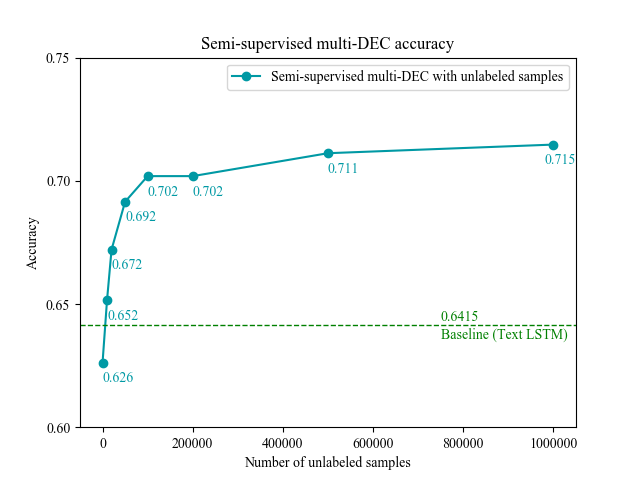

Text(0.5, 1.0, 'Semi-supervised multi-DEC accuracy')

In [179]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure()
plt.plot(df_mdec_acc, marker='o', linestyle='-', color='#0099a4', label='Semi-supervised multi-DEC with unlabeled samples')
for index, value in df_mdec_acc.iterrows(): 
    if index == 1000000:
        plt.text(index-20000, value[0]-0.008, '%.3f'%value[0], color='#0099a4')
    else:
        plt.text(index, value[0]-0.008, '%.3f'%value[0], color='#0099a4')
plt.yticks(np.arange(0.60, 0.75, 0.05))
# plt.axvline(x=100000, color='#fe8c00', linestyle=':', linewidth=1)
# plt.text(0, 0.55, '100,000', color='#fe8c00')
# plt.text(105000, 0.55, 'Pretrain limit', color='#fe8c00')
plt.axhline(y=0.6415, color='g', linestyle='--', linewidth=1)
plt.text(750000, 0.6430, '0.6415', color='g')
plt.text(750000, 0.6360, 'Baseline (Text LSTM)', color='g')
plt.legend()
plt.xlabel('Number of unlabeled samples')
plt.ylabel('Accuracy')
plt.title('Semi-supervised multi-DEC accuracy')

<IPython.core.display.Javascript object>


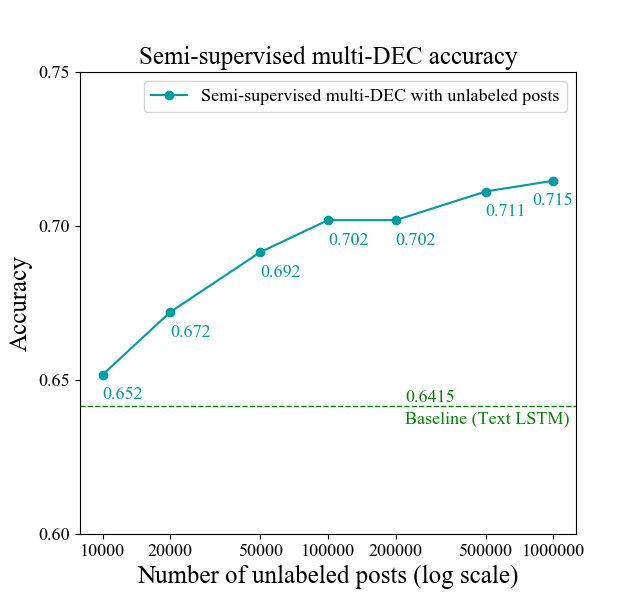

In [223]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 13})
fig1, ax1 = plt.subplots(figsize=(6.4,6))
#f = ax1.figure(figsize=(6.4, 6))
ax1.plot(df_mdec_acc.iloc[1:], marker='o', linestyle='-', color='#0099a4', label='Semi-supervised multi-DEC with unlabeled posts')
for index, value in df_mdec_acc.iloc[1:].iterrows(): 
    if index == 1000000:
        ax1.text(index-190000, value[0]-0.008, '%.3f'%value[0], color='#0099a4')
    else:
        ax1.text(index, value[0]-0.008, '%.3f'%value[0], color='#0099a4')
ax1.set_yticks(np.arange(0.60, 0.75, 0.05))
ax1.set_xscale('log')
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_xticks([10000, 20000, 50000, 100000, 200000, 500000, 1000000])
ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 
# plt.axvline(x=100000, color='#fe8c00', linestyle=':', linewidth=1)
# plt.text(0, 0.55, '100,000', color='#fe8c00')
# plt.text(105000, 0.55, 'Pretrain limit', color='#fe8c00')
plt.axhline(y=0.6415, color='g', linestyle='--', linewidth=1)
plt.text(220000, 0.6430, '0.6415', color='g')
plt.text(220000, 0.6360, 'Baseline (Text LSTM)', color='g')
plt.legend()
plt.xlabel('Number of unlabeled posts (log scale)', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title('Semi-supervised multi-DEC accuracy', fontsize=18)
fig1.savefig("multi_dec_acc_log.pdf")

In [120]:
# load raw data
mdec_result_nmi = 'mdec_result_nmi.csv'
df_mdec_nmi = pd.read_csv(os.path.join('./result', mdec_result_nmi), index_col=0, header=0, encoding='utf-8-sig')

<IPython.core.display.Javascript object>


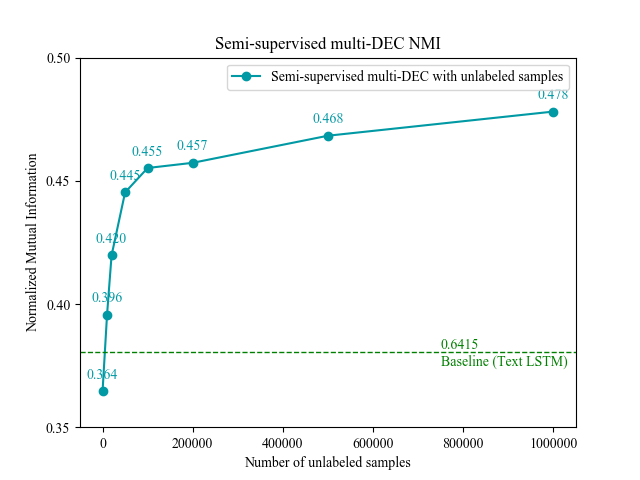

Text(0.5, 1.0, 'Semi-supervised multi-DEC NMI')

In [123]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure()
plt.plot(df_mdec_nmi, marker='o', linestyle='-', color='#0099a4', label='Semi-supervised multi-DEC with unlabeled samples')
for index, value in df_mdec_nmi.iterrows(): 
    plt.text(index-35000, value[0]+0.005, '%.3f'%value[0], color='#0099a4')
plt.yticks(np.arange(0.35, 0.50, 0.05))
# plt.axvline(x=100000, color='#fe8c00', linestyle=':', linewidth=1)
# plt.text(0, 0.55, '100,000', color='#fe8c00')
# plt.text(105000, 0.55, 'Pretrain limit', color='#fe8c00')
plt.axhline(y=0.3804, color='g', linestyle='--', linewidth=1)
plt.text(750000, 0.3819, '0.6415', color='g')
plt.text(750000, 0.3749, 'Baseline (Text LSTM)', color='g')
plt.legend()
plt.xlabel('Number of unlabeled samples')
plt.ylabel('Normalized Mutual Information')
plt.title('Semi-supervised multi-DEC NMI')

In [124]:
# load raw data
mdec_result_f1 = 'mdec_result_f1.csv'
df_mdec_f1 = pd.read_csv(os.path.join('./result', mdec_result_f1), index_col=0, header=0, encoding='utf-8-sig')

<IPython.core.display.Javascript object>


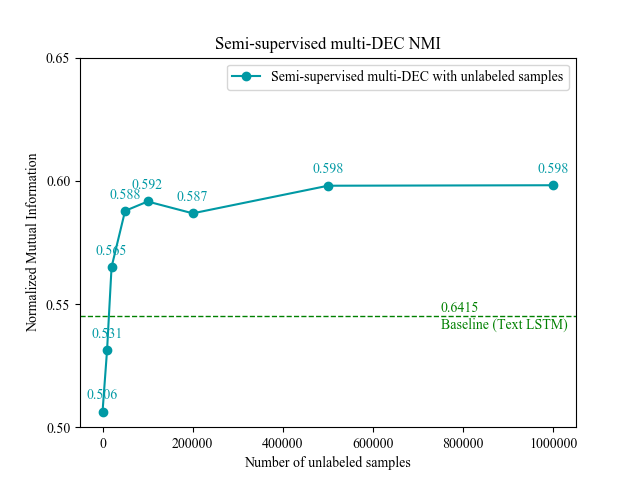

Text(0.5, 1.0, 'Semi-supervised multi-DEC NMI')

In [126]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure()
plt.plot(df_mdec_f1, marker='o', linestyle='-', color='#0099a4', label='Semi-supervised multi-DEC with unlabeled samples')
for index, value in df_mdec_f1.iterrows(): 
    plt.text(index-35000, value[0]+0.005, '%.3f'%value[0], color='#0099a4')
plt.yticks(np.arange(0.50, 0.65, 0.05))
# plt.axvline(x=100000, color='#fe8c00', linestyle=':', linewidth=1)
# plt.text(0, 0.55, '100,000', color='#fe8c00')
# plt.text(105000, 0.55, 'Pretrain limit', color='#fe8c00')
plt.axhline(y=0.5453, color='g', linestyle='--', linewidth=1)
plt.text(750000, 0.5468, '0.6415', color='g')
plt.text(750000, 0.5398, 'Baseline (Text LSTM)', color='g')
plt.legend()
plt.xlabel('Number of unlabeled samples')
plt.ylabel('Normalized Mutual Information')
plt.title('Semi-supervised multi-DEC NMI')

In [93]:
# load raw data
idec_result_acc = 'idec_result_acc.csv'
df_idec_acc = pd.read_csv(os.path.join('./result', idec_result_acc), index_col=0, header=0, encoding='utf-8-sig')
tdec_result_acc = 'tdec_result_acc.csv'
df_tdec_acc = pd.read_csv(os.path.join('./result', tdec_result_acc), index_col=0, header=0, encoding='utf-8-sig')

In [95]:
print(df_idec_acc)
print(df_tdec_acc)

                             accuracy
number of unlabeled samples          
0                              0.5222
10000                          0.5471
20000                          0.5694
50000                          0.5812
100000                         0.5989
200000                         0.5969
500000                         0.5824
1000000                        0.5749
                             accuracy
number of unlabeled samples          
0                              0.5443
10000                          0.5697
20000                          0.5795
50000                          0.5919
100000                         0.5916
200000                         0.5939
500000                         0.5905
1000000                        0.5705


<IPython.core.display.Javascript object>


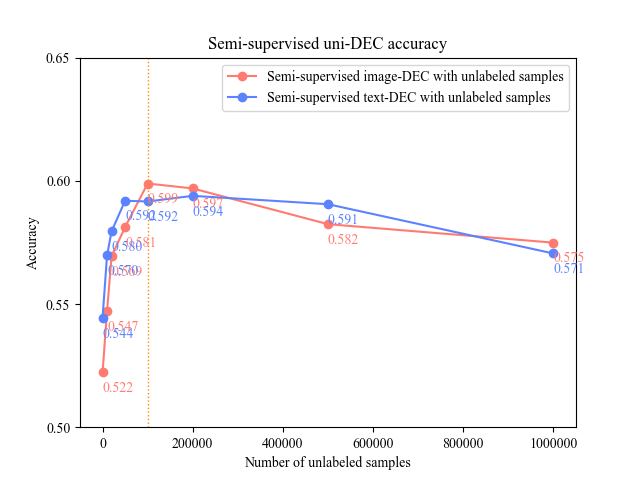

Text(0.5, 1.0, 'Semi-supervised uni-DEC accuracy')

In [181]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure()
plt.plot(df_idec_acc, marker='o', linestyle='-', color='#ff7b72', label='Semi-supervised image-DEC with unlabeled samples')
for index, value in df_idec_acc.iterrows(): 
    plt.text(index, value[0]-0.008, '%.3f'%value[0], color='#ff7b72')
plt.plot(df_tdec_acc, marker='o', linestyle='-', color='#5c83ff', label='Semi-supervised text-DEC with unlabeled samples')
for index, value in df_tdec_acc.iterrows(): 
    plt.text(index, value[0]-0.008, '%.3f'%value[0], color='#5c83ff')
plt.yticks(np.arange(0.50, 0.65, 0.05))
plt.axvline(x=100000, color='#fe8c00', linestyle=':', linewidth=1)
plt.text(0, 0.75, '100,000', color='#fe8c00')
plt.text(105000, 0.75, 'Pretrain limit', color='#fe8c00')
plt.legend()
plt.xlabel('Number of unlabeled samples')
plt.ylabel('Accuracy')
plt.title('Semi-supervised uni-DEC accuracy')